[*********************100%***********************]  1 of 1 completed
Mean Monthly_Drawdown (%): 14.42
Mode Monthly_Drawdown (%): 10.94


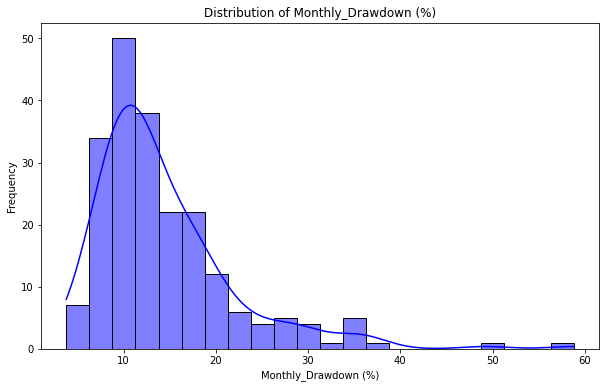

Mean Log Returns: 0.132593
Standard Deviation of Log Returns: 0.063492
Lower 2SD Interval: 0.005608
Upper 2SD Interval: 0.259577


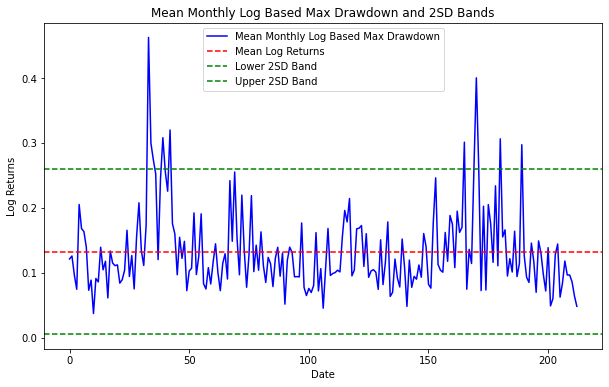

In [32]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the stock symbol and date range
stock_symbol = 'TATAMOTORS.NS'  # Replace with the symbol of the stock you want to analyze
start_date = '2006-01-01'
end_date = '2023-09-24'  # Modify the end date as needed

# Fetch historical stock data using yfinance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate the returns from the monthly peak and monthly trough for each month
def calculate_max_monthly_drawdown(stock_data):
    monthly_drawdowns = []
    monthly_peaks = []
    monthly_troughs = []

    for _, month_data in stock_data.resample('M'):
        if not month_data.empty:
            monthly_peak = month_data['Adj Close'].max()
            monthly_trough = month_data['Adj Close'].min()
            monthly_return = ((monthly_peak - monthly_trough) / monthly_peak) * 100  # Calculate the return in percentage

            monthly_drawdowns.append(round(monthly_return, 2))
            monthly_peaks.append(round(monthly_peak, 2))
            monthly_troughs.append(round(monthly_trough, 2))

    return monthly_peaks, monthly_troughs, monthly_drawdowns

monthly_peaks, monthly_troughs, monthly_drawdowns = calculate_max_monthly_drawdown(stock_data)

# Create a DataFrame to display the results
result_df = pd.DataFrame({
    'Monthly_Peak': monthly_peaks,
    'Monthly_Trough': monthly_troughs,
    'Monthly_Drawdown (%)': monthly_drawdowns
})

# Calculate mean and mode of Monthly_Drawdown
mean_drawdown = result_df['Monthly_Drawdown (%)'].mean()
mode_drawdown = result_df['Monthly_Drawdown (%)'].mode().values[0]

# Print mean and mode
print(f"Mean Monthly_Drawdown (%): {mean_drawdown:.2f}")
print(f"Mode Monthly_Drawdown (%): {mode_drawdown:.2f}")

# Plot a distribution of Monthly_Drawdown using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(result_df['Monthly_Drawdown (%)'], kde=True, color='blue')
plt.title('Distribution of Monthly_Drawdown (%)')
plt.xlabel('Monthly_Drawdown (%)')
plt.ylabel('Frequency')
plt.show()

# Convert Monthly_Drawdown to log returns
log_returns = np.log(1 + result_df['Monthly_Drawdown (%)'] / 100)

# Calculate mean and standard deviation of log returns
mean_log_returns = log_returns.mean()
std_log_returns = log_returns.std()

# Create 2SD intervals for log returns
lower_interval = mean_log_returns - 2 * std_log_returns
upper_interval = mean_log_returns + 2 * std_log_returns

# Rename the log_returns column
log_returns = log_returns.rename('Mean Monthly Log Based Max Drawdown')

print(f"Mean Log Returns: {mean_log_returns:.6f}")
print(f"Standard Deviation of Log Returns: {std_log_returns:.6f}")
print(f"Lower 2SD Interval: {lower_interval:.6f}")
print(f"Upper 2SD Interval: {upper_interval:.6f}")

# Plot mean log returns and 2SD bands
plt.figure(figsize=(10, 6))
plt.plot(log_returns.index, log_returns, label='Mean Monthly Log Based Max Drawdown', color='blue')
plt.axhline(mean_log_returns, color='red', linestyle='--', label='Mean Log Returns')
plt.axhline(lower_interval, color='green', linestyle='--', label='Lower 2SD Band')
plt.axhline(upper_interval, color='green', linestyle='--', label='Upper 2SD Band')
plt.title('Mean Monthly Log Based Max Drawdown and 2SD Bands')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.show()
